# Gráficas

                    Programa hecho por Rafael Alejandro García Ramírez

In [61]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os, requests

In [62]:
tmin=pd.read_csv('data/2019TMin.csv',encoding='latin-1')
# # # # # # # #
tmed=pd.read_csv('data/2019TMed.csv',encoding='latin-1')
# # # # # # # #
tmax=pd.read_csv('data/2019TMax.csv',encoding='latin-1')
# # # # # # # #
lluv=pd.read_csv('data/2019Lluv.csv',encoding='latin-1')
# # # # # # # # 
m=pd.read_excel('data/tabuladorPe2019.xls',header=9)

# Sueldos Mensuales Netos

In [63]:
m.columns

Index(['NIVEL', 'TIPO', 'PUESTO', 'SUELDO BASE', 'CUOTAS SEGURIDAD SOCIAL',
       'PREVISIÓN SOCIAL', 'AYUDA X SERVICIOS', 'APOYO FAMILIAR',
       'GRATIFICACIÓN QUINCENAL', 'SUELDO MENSUAL BRUTO', 'IMPTO MENSUAL',
       'ISSEG', 'ISSSTE', 'SUELDO MENSUAL NETO', 'PRIMA VACACIONAL',
       'AGUINALDO'],
      dtype='object')

In [64]:
sueldos = m["SUELDO MENSUAL NETO"]
Max = max(sueldos)
Min = min(sueldos)
ran = (Max-Min)/6
x = np.arange(0, 6)
y = np.zeros(6)
for i in range(6):
    p = sueldos[i*ran<sueldos]
    y[i] = len(p[p<(i+1)*ran])

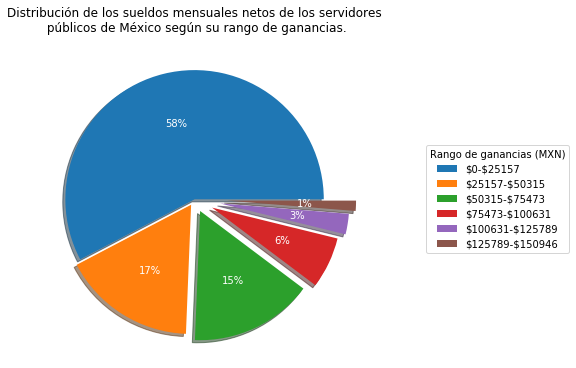

In [65]:
#Copié la receta de la página de matplotlib
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)

labels = ["\$" + str(int(i*ran))+ "-\$"+str(int((i+1)*ran)) for i in range(6)]

wedges, texts, autotexts = ax.pie(y, explode = (0,0.05,0.1,0.15,0.2,0.25),
      autopct='%1.0f%%', shadow=True, textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="Rango de ganancias (MXN)",
          loc="center left",
          bbox_to_anchor=(1.2, 0, 0.5, 1))

ax.set_title("Distribución de los sueldos mensuales netos de los servidores\n públicos de México según su rango de ganancias.")
plt.show()

# Temperaturas Máxima, Media y Mínima

In [66]:
tmin.columns

Index(['Lon', 'Lat', 'Clave', 'Edo', 'Est', 'Tmin'], dtype='object')

In [67]:
tmed.columns

Index(['Lon', 'Lat', 'Clave', 'Edo', 'Est', 'Tmed'], dtype='object')

In [68]:
tmax.columns

Index(['Lon', 'Lat', 'Clave', 'Edo', 'Est', 'Tmax'], dtype='object')

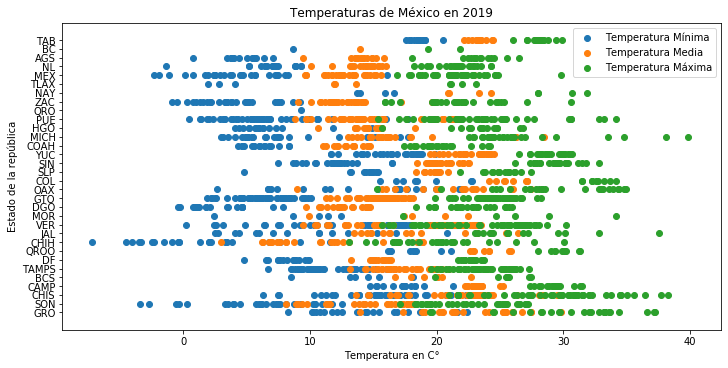

In [69]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.scatter(tmin.Tmin,tmin.Edo,label="Temperatura Mínima")
ax.scatter(tmed.Tmed,tmed.Edo,label="Temperatura Media")
ax.scatter(tmax.Tmax,tmax.Edo,label="Temperatura Máxima")
ax.legend()
plt.ylabel("Estado de la república")
plt.xlabel("Temperatura en C°")
plt.title("Temperaturas de México en 2019")
plt.show()

# Lluvias

In [70]:
lluv.columns

Index(['LON', 'LAT', 'EDO', 'CLAVE_SIH', 'NOMBRE', 'ENE'], dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

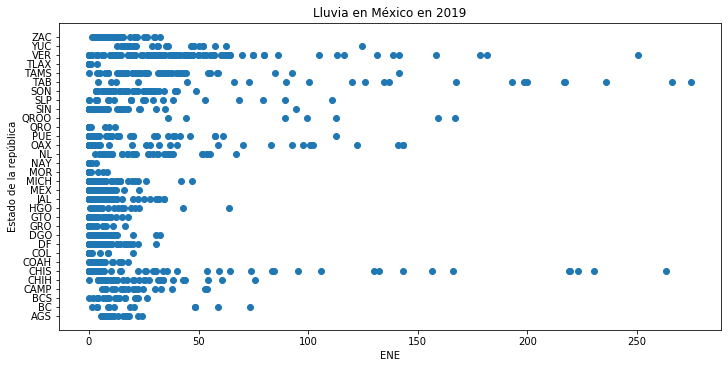

In [71]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax.scatter(lluv.ENE,lluv.EDO)
plt.ylabel("Estado de la república")
plt.xlabel("ENE")
plt.title("Lluvia en México en 2019")
plt.show

# Salarios Mínimos

In [72]:
file = 'data/SalariosMinimos.csv'
if not os.path.isfile(file):
    url = 'https://idconline.mx/laboral/salarios-minimos/salarios-minimos-1986-2007'
    html = requests.get(url).content
    salarios_list = pd.read_html(html, header = 1)
    salarios = salarios_list[-1]
    salarios.to_csv('data/SalariosMinimos.csv',encoding='latin-1')
else:
    salarios = pd.read_csv(file,encoding="latin-1")

In [73]:
sm=pd.read_csv('data/SalariosMinimos.csv',encoding='latin-1')
sm=sm.rename(columns={'"A"':'a','"B"':'b','"C"':'c','Unnamed: 0':'n'})# Le cambio el nombre dado que las dobles
# comillas me daban problemas
sm.head(10)

,n,Fecha de publicaciï¿½n el DOF,Vigente a partir de:,ZLFN1,Resto del paï¿½s,a,b,c
0,0,23 de diciembre de 2019,1o. enero 2020,$185.56,$123.22,NaN,NaN,NaN
1,1,26 de diciembre de 2018,1o. enero 2019,$176.72,$102.68,NaN,NaN,NaN
2,2,21 de diciembre de 2017,1o. enero 2018,NaN,NaN,88.36,NaN,NaN
3,3,24 de noviembre de 2017,1o. diciembre 2017,NaN,NaN,88.36,NaN,NaN
4,4,19 de diciembre de 2016,1o. enero 2017,NaN,NaN,80.04,NaN,NaN
5,5,18 de diciembre de 2015,1o. enero 2016,NaN,NaN,73.04,NaN,NaN
6,6,30 de septiembre de 2015,1o. octubre de 2015,NaN,NaN,70.10,NaN,NaN
7,7,30 de marzo de 2015,1o. abril 2015,NaN,NaN,70.10,68.28,NaN
8,8,29 de diciembre de 2014,1o. enero 2015,NaN,NaN,70.10,66.45,NaN
9,9,26 de diciembre de 2013,1o. enero 2014,NaN,NaN,67.29,63.77,NaN


In [74]:
sm.columns

Index(['n', 'Fecha de publicaciï¿½n el DOF', 'Vigente a partir de:', 'ZLFN1',
       'Resto del paï¿½s', 'a', 'b', 'c'],
      dtype='object')

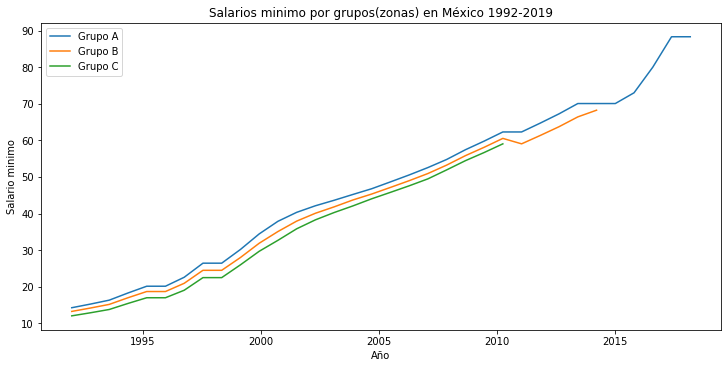

In [75]:
sm = sm.sort_values(by = "n", ascending = False)
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True)
x = np.linspace(1992, 2019, 35)
a = sm.a[9:44]
b = sm.b[9:44]
c = sm.c[9:44]
ax.plot(x,a,label="Grupo A")
ax.plot(x,b,label="Grupo B")
ax.plot(x,c,label="Grupo C")
plt.ylabel("Salario minimo")
plt.xlabel("Año")
plt.title("Salarios minimo por grupos(zonas) en México 1992-2019")
ax.legend()
plt.show()

Nota: tuve que editar y eliminar manualmente datos y celdas del archivo .csv dado que se guardaban de forma corrupta.